In [9]:
import numpy as np
from scipy import integrate
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
def model_2BP(t,state):
    ME = 5.98E+24
    G  = 6.67E-11 
    mu = ME*G*1E-9  # Earth's gravitational parameter = M*G  
                          # [km^3/s^2]
    x = state[0]
    y = state[1]
    z = state[2]

    r = np.sqrt(x**2 + y**2 + z**2)
    
    x_dot = state[3]
    y_dot = state[4]
    z_dot = state[5]
    
    x_ddot = -(mu)/(r**3)*x
    y_ddot = -(mu)/(r**3)*y
    z_ddot = -(mu)/(r**3)*z
    
    dstate_dt = [x_dot, y_dot, z_dot, x_ddot, y_ddot, z_ddot]
    return dstate_dt

In [11]:
# Initial Conditions / ISS
x0 = -2775.03475
y0 = 4524.24941
z0 = 4207.43331
vx0 = -3.641793088
vy0 = -5.665088604
vz0 =  3.679500667

In [12]:
state_0 = [x0, y0, z0, vx0, vy0, vz0]

t0 = 0 #seconds
tf = 21600 #seconds
n = 2000 #points

time = np.linspace(t0,tf,n)

data = integrate.solve_ivp(model_2BP, (t0,tf), state_0, method='DOP853', t_eval=time);

print("Time", data.t)
print("X data", data.y[0])
print("Y data", data.y[1])
print("Z data", data.y[2])

Time [0.00000000e+00 1.08054027e+01 2.16108054e+01 ... 2.15783892e+04
 2.15891946e+04 2.16000000e+04]
X data [-2775.03475    -2814.17682722 -2852.8970676  ...  -128.8080804
  -180.8324778   -232.79049839]
Y data [4524.24941    4462.6982966  4400.47823792 ... 6658.46818295 6645.18853431
 6630.97689205]
Z data [4207.43331    4246.87546862 4285.68103311 ... 1219.10052184 1282.40391726
 1345.47588518]


In [13]:
print(data.t)
print(data.y)

[0.00000000e+00 1.08054027e+01 2.16108054e+01 ... 2.15783892e+04
 2.15891946e+04 2.16000000e+04]
[[-2.77503475e+03 -2.81417683e+03 -2.85289707e+03 ... -1.28808080e+02
  -1.80832478e+02 -2.32790498e+02]
 [ 4.52424941e+03  4.46269830e+03  4.40047824e+03 ...  6.65846818e+03
   6.64518853e+03  6.63097689e+03]
 [ 4.20743331e+03  4.24687547e+03  4.28568103e+03 ...  1.21910052e+03
   1.28240392e+03  1.34547589e+03]
 [-3.64179309e+00 -3.60302477e+00 -3.56371518e+00 ... -4.81004694e+00
  -4.80787343e+00 -4.80499278e+00]
 [-5.66508860e+00 -5.72742456e+00 -5.78890386e+00 ... -1.17360870e+00
  -1.26582377e+00 -1.35796094e+00]
 [ 3.67950067e+00  3.62085924e+00  3.56167327e+00 ...  5.86147951e+00
   5.84410597e+00  5.82585568e+00]]


<function matplotlib.pyplot.show(close=None, block=None)>

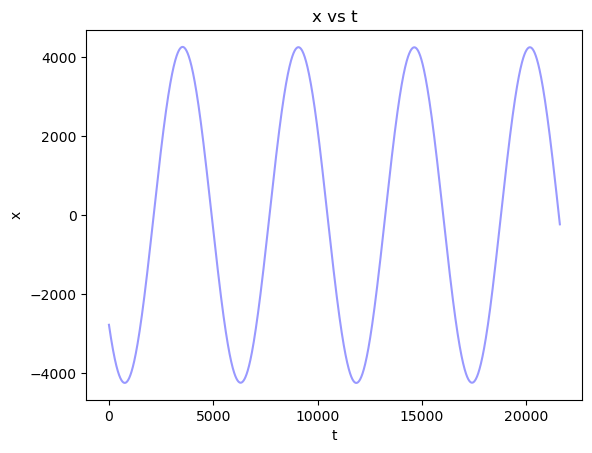

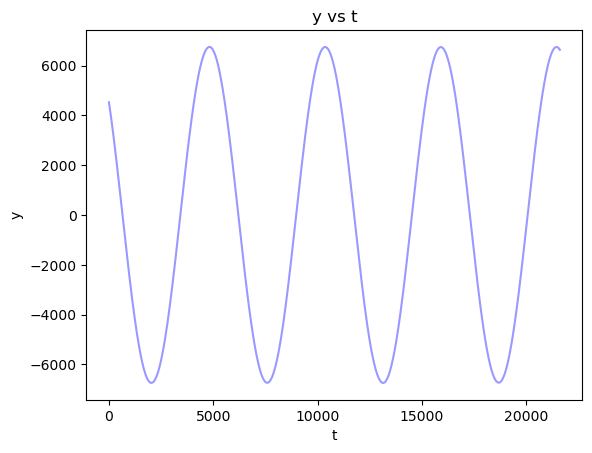

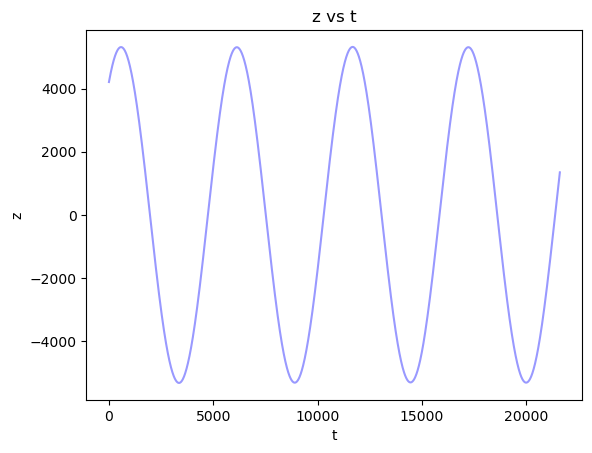

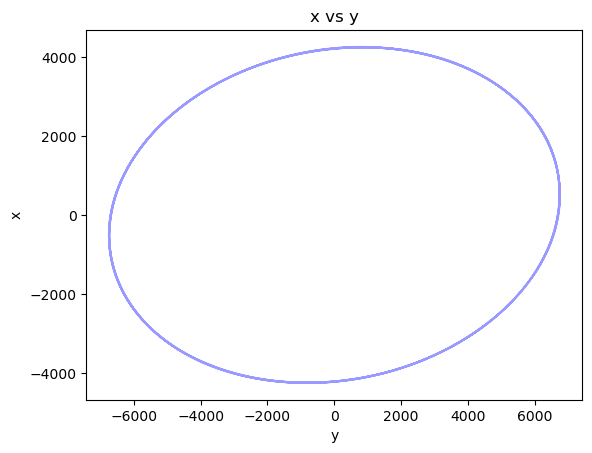

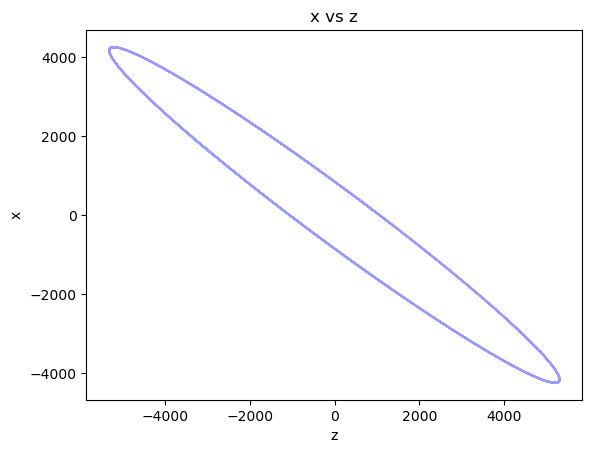

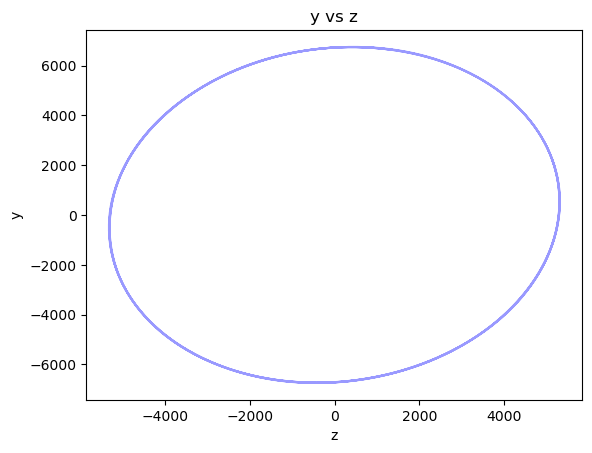

In [14]:
fig1 = plt.figure()
ax = plt.axes()
ax.set_xlabel('t') 
ax.set_ylabel('x')
plt.title('x vs t')
ax.plot(data.t, data.y[0], color = 'blue', alpha = 0.4)

fig2 = plt.figure()
ax = plt.axes()
ax.set_xlabel('t') 
ax.set_ylabel('y')
plt.title('y vs t')
ax.plot(data.t, data.y[1], color = 'blue', alpha = 0.4)

fig3 = plt.figure()
ax = plt.axes()
ax.set_xlabel('t') 
ax.set_ylabel('z')
plt.title('z vs t')
ax.plot(data.t, data.y[2], color = 'blue', alpha = 0.4)

fig4 = plt.figure()
ax = plt.axes()
ax.set_xlabel('y') 
ax.set_ylabel('x')
plt.title('x vs y')
ax.plot(data.y[1], data.y[0], color = 'blue', alpha = 0.4)

fig5 = plt.figure()
ax = plt.axes()
ax.set_xlabel('z') 
ax.set_ylabel('x')
plt.title('x vs z')
ax.plot(data.y[2], data.y[0], color = 'blue', alpha = 0.4)

fig6 = plt.figure()
ax = plt.axes()
ax.set_xlabel('z') 
ax.set_ylabel('y')
plt.title('y vs z')
ax.plot(data.y[2], data.y[1], color = 'blue', alpha = 0.4)
plt.show

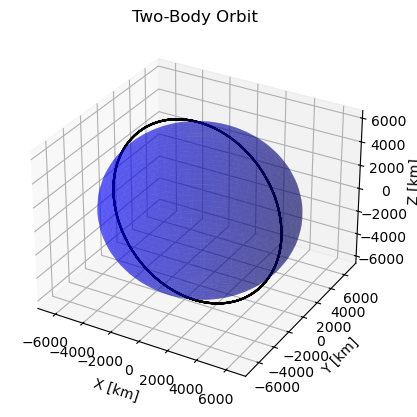

In [15]:
# Setting up Spherical Earth to Plot
N = 50
phi = np.linspace(0, 2 * np.pi, N)
theta = np.linspace(0, np.pi, N)
theta, phi = np.meshgrid(theta, phi)

r_Earth = 6378.14  # Average radius of Earth [km]
X_Earth = r_Earth * np.cos(phi) * np.sin(theta)
Y_Earth = r_Earth * np.sin(phi) * np.sin(theta)
Z_Earth = r_Earth * np.cos(theta)

# Plotting Earth and Orbit
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X_Earth, Y_Earth, Z_Earth, color='blue', alpha=0.4)

#you need to redefine x_sat,y_sat, and z_sat to use your x,y,z solution array names
ax.plot3D(data.y[0], data.y[1], data.y[2], 'black')

#ax.view_init(30, 145)  # Changing viewing angle (adjust as needed)
plt.title('Two-Body Orbit')
ax.set_xlabel('X [km]')
ax.set_ylabel('Y [km]')
ax.set_zlabel('Z [km]');